In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("maryland_accident_dataset_by_report_no.csv")
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,...,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
29588,MCP2526000L,N,Apparently Asleep,No Misuse,Y,Possible Incapacitating Injury,e0715157-51da-4266-bfeb-9dbb80117fba,D,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-11-15 15:34:00,28.0
29589,AC2051000K,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Shoulder/Lap Belt(s),M,...,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-19 22:40:00,42.0
29590,ADI5630003,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,63529935-542d-4c69-af1f-1b3e49894090,D,Shoulder/Lap Belt(s),M,...,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,N,Slowing or Stopping,2015-10-22 18:00:00,51.0
29591,HM0146000D,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,400dc255-6c26-4e47-9f75-920439556f0b,D,Shoulder/Lap Belt(s),M,...,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Y,Moving Constant Speed,2015-11-29 22:45:00,26.0
29592,MCP1519000S,N,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Y,Possible Incapacitating Injury,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Shoulder/Lap Belt(s),M,...,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-03 02:42:00,45.0


In [3]:
list(df.columns)

['REPORT_NO',
 'CDL_FLAG',
 'CONDITION_CODE',
 'EQUIP_PROB_CODE',
 'FAULT_FLAG',
 'INJ_SEVER_CODE',
 'PERSON_ID',
 'PERSON_TYPE',
 'SAF_EQUIP_CODE',
 'SEX_CODE',
 'VEHICLE_ID',
 'COLLISION_TYPE_CODE',
 'C_M_ZONE_FLAG',
 'JUNCTION_CODE',
 'LANE_CODE',
 'LIGHT_CODE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'SURF_COND_CODE',
 'WEATHER_CODE',
 'AREA_DAMAGED_CODE_MAIN',
 'BODY_TYPE_CODE',
 'DAMAGE_CODE',
 'HIT_AND_RUN_FLAG',
 'MOVEMENT_CODE',
 'TIME',
 'AGE']

# EDA

In [4]:
person_damage_type = df[['INJ_SEVER_CODE']].groupby(df['INJ_SEVER_CODE']).count()
person_damage_type.rename(columns = {'INJ_SEVER_CODE':'Count'})

,Count
INJ_SEVER_CODE,
Fatal Injury,26
Incapacitating/Disabled Injury,239
No Injury,24451
Non-incapacitating Injury,1751
Possible Incapacitating Injury,3126


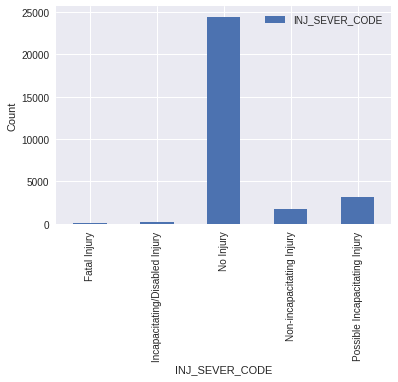

In [5]:
fig1 = person_damage_type.plot.bar()
fig1.set_ylabel("Count")
plt.show()

In [6]:
vehicle_damage_type = df[['DAMAGE_CODE']].groupby(df['DAMAGE_CODE']).count()
vehicle_damage_type.rename(columns = {'DAMAGE_CODE':'Count'})

,Count
DAMAGE_CODE,
Destroyed,1786
Disabling,12413
Functional,7777
No Damage,742
Superficial,6875


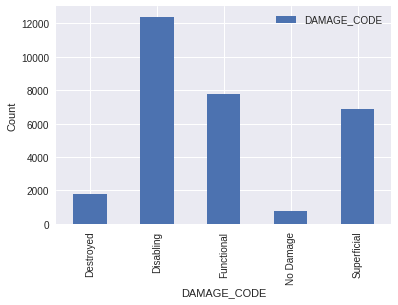

In [7]:
fig2 = vehicle_damage_type.plot.bar()
fig2.set_ylabel("Count")
plt.show()

> 사람의 부상정도와 차량의 파손정도는 다른 양상을 보인다. 차는 크게 파손되었지만 사람은 별로 다치지 않은 경우가 많다. 
물론 현재 데이터에 '운전자' 정보만 들어가 있으므로 보행자 부상 여부는 알 수 없다. 하지만 안전벨트, 차량의 충격 흡수 등에 따라 운전자는 상대적으로 안전하게 보호받는 것을 알 수 있다.

# Preprocessing

> 분석에 사용할 변수를 선택하는 작업은 자의적이다. 도메인 지식을 단시간에 쌓는 것을 불가능하므로 보건복지부 자료를 바탕으로 변수를 분류, 선택해보았다.

- 첫번째, 사람에 의한 원인
 - (1) 음주운전
 - (2) 졸음 및 피로운전
 - (3) 기타 요인 (약물복용 중 사고나, 운전 중 기존 질환의 악화나 발생으로 인한 사고)
 - (4) 기타...
 
 
- 두번째, 보호 장구 미착용 요인
 - (1) 안전벨트 착용
 - (2) 에어백
 - (3) 안전의자
 - (4) 헬멧 착용
 - (5) 기타...
 
 
- 세번째, 환경적 요인
 - (1) 날씨
 - (2) 노면상태
 - (3) 기타...

### convert hour

In [8]:
from datetime import datetime

convert_hour = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour
df['TIME'] = df["TIME"].apply(convert_hour)

### classify time period

In [9]:
time_period = df["TIME"].copy()

time_period[(0<=df['TIME']) & (df['TIME']<6)] = 'DAWN'
time_period[(6<=df['TIME']) & (df['TIME']<12)] = 'MORNING'
time_period[(12<=df['TIME']) & (df['TIME']<18)] = 'AFTERNOON'
time_period[(18<=df['TIME'])] = 'EVENING'
df['TIME_PERIOD'] = time_period
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,...,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE,TIME_PERIOD
29588,MCP2526000L,N,Apparently Asleep,No Misuse,Y,Possible Incapacitating Injury,e0715157-51da-4266-bfeb-9dbb80117fba,D,Shoulder/Lap Belt(s),M,...,Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,15,28.0,AFTERNOON
29589,AC2051000K,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Shoulder/Lap Belt(s),M,...,Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,22,42.0,EVENING
29590,ADI5630003,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,63529935-542d-4c69-af1f-1b3e49894090,D,Shoulder/Lap Belt(s),M,...,Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,N,Slowing or Stopping,18,51.0,EVENING
29591,HM0146000D,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,400dc255-6c26-4e47-9f75-920439556f0b,D,Shoulder/Lap Belt(s),M,...,"Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Y,Moving Constant Speed,22,26.0,EVENING
29592,MCP1519000S,N,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Y,Possible Incapacitating Injury,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Shoulder/Lap Belt(s),M,...,Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2,45.0,DAWN


In [10]:
want_to_drop_cols = ['REPORT_NO',
 'CDL_FLAG',
 'FAULT_FLAG',
 'PERSON_ID',
 'PERSON_TYPE',
 'VEHICLE_ID',
 'HIT_AND_RUN_FLAG',
 'TIME']


In [11]:
appropriate_df = df.drop(want_to_drop_cols, axis = 1)
appropriate_df.tail()

,CONDITION_CODE,EQUIP_PROB_CODE,INJ_SEVER_CODE,SAF_EQUIP_CODE,SEX_CODE,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,MOVEMENT_CODE,AGE,TIME_PERIOD
29588,Apparently Asleep,No Misuse,Possible Incapacitating Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,Moving Constant Speed,28.0,AFTERNOON
29589,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,Moving Constant Speed,42.0,EVENING
29590,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,Slowing or Stopping,51.0,EVENING
29591,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Moving Constant Speed,26.0,EVENING
29592,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Possible Incapacitating Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,Moving Constant Speed,45.0,DAWN


In [12]:
want_to_dummify_cols = []
for col in list(appropriate_df.columns):
    if not col == "AGE":
        want_to_dummify_cols.append(col)

dummified_df = pd.get_dummies(appropriate_df, columns = want_to_dummify_cols)
dummified_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,28.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29589,42.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29590,51.0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
29591,26.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29592,45.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
want_to_scale_cols = ["AGE"]
scaled_df = dummified_df.copy()
scaled_df["AGE"] = (scaled_df["AGE"].mean() - scaled_df["AGE"])/scaled_df["AGE"].std()

In [31]:
scaled_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,0.771133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29589,-0.109788,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29590,-0.676095,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
29591,0.896979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29592,-0.298557,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Analysis

In [14]:
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [15]:
z = linkage(scaled_df, 'ward')

In [16]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

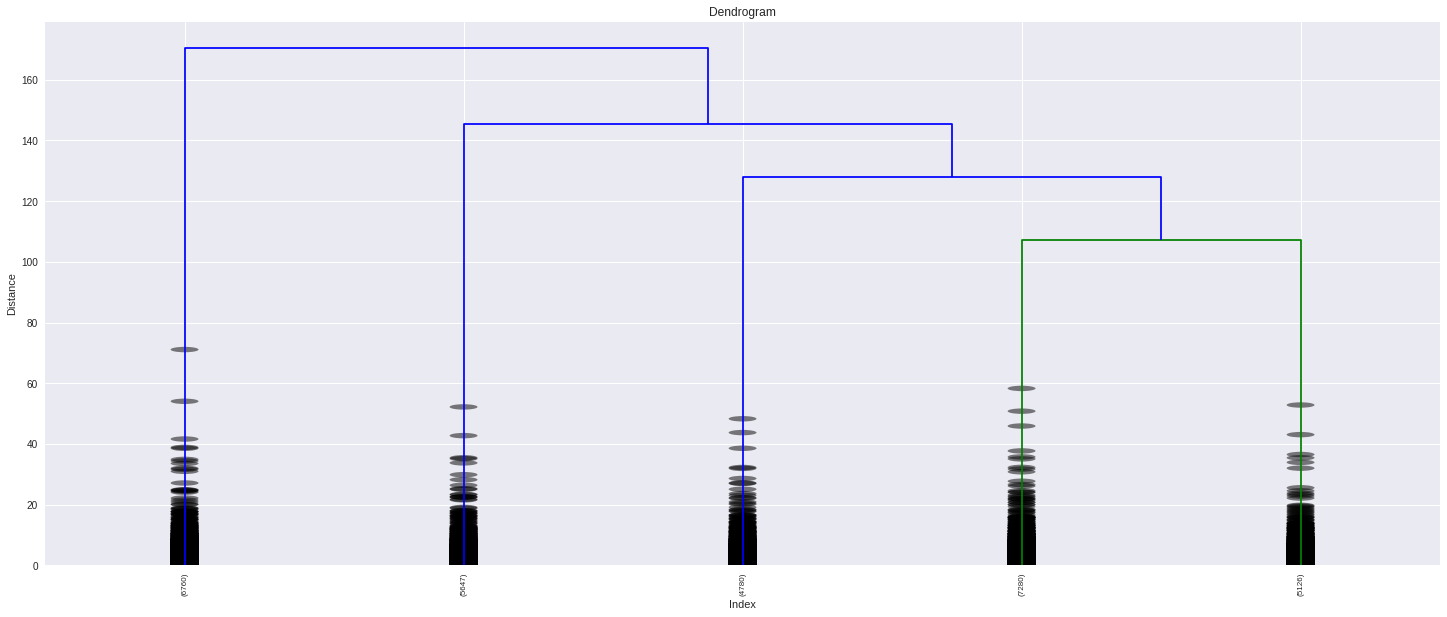

In [17]:
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 5, max_d = 200)

In [18]:
from scipy.cluster.hierarchy import fcluster

predicted_labels = fcluster(z, 90, criterion = 'distance') 
predicted_labels # 0부터가 아니라 1부터 시작함. sklearn과 다름
set(predicted_labels)

{1, 2, 3, 4, 5}

In [32]:
result_df = scaled_df.copy()
result_df['scipy_hc_labels'] = predicted_labels
result_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,0.771133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
29589,-0.109788,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29590,-0.676095,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2
29591,0.896979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29592,-0.298557,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,5


In [88]:
component_check_df = result_df.copy()
component_check_df["AGE"] = df["AGE"]
component_check_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,28.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
29589,42.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29590,51.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2
29591,26.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29592,45.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,5


In [90]:
for cluster in component_check_df['scipy_hc_labels'].unique():
    print("\ncluster",cluster,"\n")
    print(component_check_df[component_check_df['scipy_hc_labels'] == cluster].mean().sort_values(ascending=False)[:20])


cluster 1 

AGE                                      39.159615
scipy_hc_labels                           1.000000
EQUIP_PROB_CODE_No Misuse                 0.997041
C_M_ZONE_FLAG_N                           0.993047
SAF_EQUIP_CODE_Shoulder/Lap Belt(s)       0.988018
RD_COND_CODE_No Defects                   0.975296
CONDITION_CODE_Apparently Normal          0.968787
SURF_COND_CODE_Wet                        0.850592
INJ_SEVER_CODE_No Injury                  0.825740
LANE_CODE_Right Turn Lane                 0.687278
WEATHER_CODE_Raining                      0.669970
BODY_TYPE_CODE_Passenger Car              0.659467
JUNCTION_CODE_Non Intersection            0.584911
LIGHT_CODE_Daylight                       0.540828
SEX_CODE_F                                0.535207
MOVEMENT_CODE_Moving Constant Speed       0.534320
DAMAGE_CODE_Disabling                     0.479438
SEX_CODE_M                                0.464793
RD_DIV_CODE_Two-way, Not Divided          0.434911
AREA_DAMAGED_CODE_

In [20]:
pd.value_counts(result_df['scipy_hc_labels'].values, sort=False)

1    6760
2    5647
3    4780
4    7280
5    5126
dtype: int64

# Decesion Tree

In [21]:
X, y = result_df.drop('scipy_hc_labels', axis = 1), result_df['scipy_hc_labels']

In [22]:
from sklearn.tree import DecisionTreeClassifier

class_weight = 'balanced'
max_depth = 3

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify = y)

In [24]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight = class_weight, max_depth = max_depth)

In [25]:
# fit to model
dt_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
dt_model.predict(X = X_test)

array([2, 1, 4, ..., 4, 4, 5], dtype=int32)

In [27]:
dt_model.score(X = X_test, y = y_test)

0.72631436680632522

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred = dt_model.predict(X = X_test), y_true = y_test)

array([[1618,   30,    0,   31,   11],
       [  17, 1242,    0,   90,   63],
       [  48,   44,    0,  900,  203],
       [  67,   93,    0, 1464,  196],
       [  56,   41,    0,  135, 1050]])

# Visualization

In [29]:
from sklearn.tree import export_graphviz
import graphviz

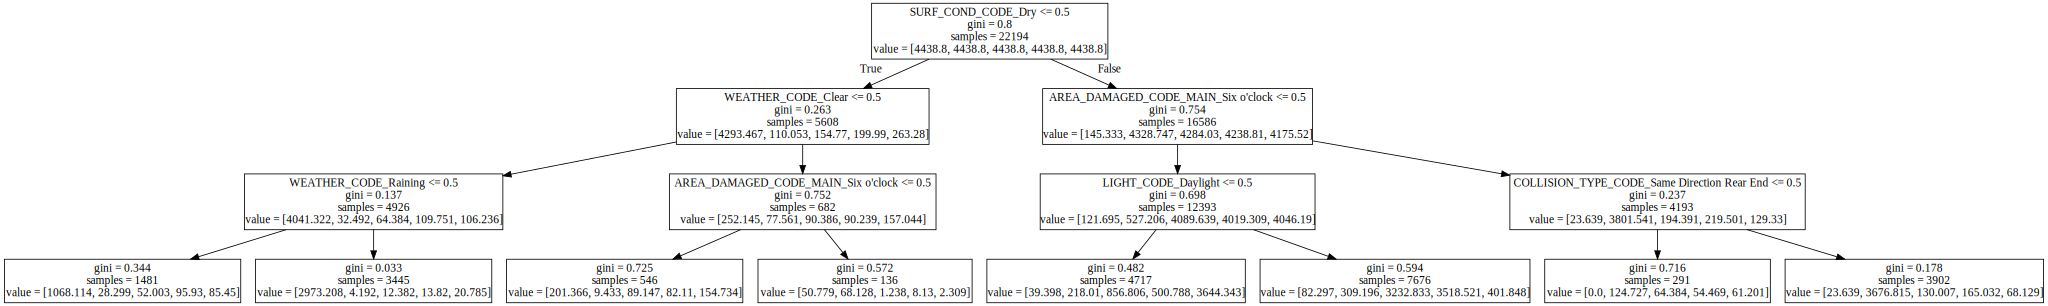

In [30]:
with open('test_tree.dot', "w") as f:
    export_graphviz(dt_model, f, feature_names = X.columns)
    
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)